# Instalando Bibliotecas Adicionais

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip &> /dev/null

# Importando Bibliotecas

In [ ]:
import altair as alt
import pandas as pd
from ipywidgets import interact
from pandas_profiling import ProfileReport
from tabulate import tabulate

# Carregando os Dados

In [ ]:
df = pd.read_csv(
    f'https://raw.githubusercontent.com/george-gca/MO826_IA368_CF044/main/data/processed/dados_conjuntos.csv')

df

,Lat,Long,Municipio,Estado,AreaKm2,Desmatado2008,Incremento20072008,Desmatado2009,Incremento20082009,Desmatado2010,Incremento20092010,Desmatado2011,Incremento20102011,Desmatado2012,Incremento20112012,Desmatado2013,Incremento20122013,Desmatado2014,Incremento20132014,Desmatado2015,Incremento20142015,Desmatado2016,Incremento20152016,Desmatado2017,Incremento20162017,Desmatado2018,Incremento20172018,Desmatado2019,Incremento20182019,PercDesmatado2008,PercDesmatado2009,PercDesmatado2010,PercDesmatado2011,PercDesmatado2012,PercDesmatado2013,PercDesmatado2014,PercDesmatado2015,PercDesmatado2016,PercDesmatado2017,PercDesmatado2018,PercDesmatado2019,CodIbge,Internacoes2008,Internacoes2009,Internacoes2010,Internacoes2011,Internacoes2012,Internacoes2013,Internacoes2014,Internacoes2015,Internacoes2016,Internacoes2017,Internacoes2018,Internacoes2019
0,-1.73866,-48.85524,Abaetetuba,PA,1617,683.3,1.2,686.4,3.1,690.2,3.8,691.0,0.8,693.2,2.2,693.6,0.4,693.8,0.3,694.4,0.6,694.8,0.4,696.2,1.4,696.8,0.6,697.2,0.3,0.422573,0.424490,0.426840,0.427335,0.428695,0.428942,0.429066,0.429437,0.429685,0.430550,0.430921,0.431169,150010,88.0,52.0,261.0,201.0,238.0,138.0,30.0,55.0,94.0,36.0,9.0,7.0
1,-4.96265,-48.39406,Abel Figueiredo,PA,616,561.5,2.0,562.6,1.1,564.5,1.9,565.0,0.5,565.0,0.0,565.4,0.4,565.8,0.4,566.0,0.1,566.5,0.5,566.7,0.2,567.7,1.0,571.9,4.2,0.911526,0.913312,0.916396,0.917208,0.917208,0.917857,0.918506,0.918831,0.919643,0.919968,0.921591,0.928409,150013,12.0,25.0,30.0,18.0,28.0,15.0,7.0,5.0,3.0,4.0,1.0,7.0
2,-9.46606,-49.33901,Abreulândia,TO,1900,7.4,1.9,7.4,0.0,7.4,0.0,7.4,0.0,7.4,0.0,7.4,0.0,7.4,0.0,7.5,0.1,9.7,2.2,9.9,0.2,9.9,0.0,9.9,0.0,0.003895,0.003895,0.003895,0.003895,0.003895,0.003895,0.003895,0.003947,0.005105,0.005211,0.005211,0.005211,170025,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-2.03379,-48.31904,Acará,PA,4361,2263.7,47.9,2276.0,12.3,2306.8,30.8,2321.9,15.1,2326.9,5.0,2344.9,17.9,2350.8,6.0,2357.8,7.0,2365.0,7.2,2385.1,20.1,2403.0,17.9,2421.3,18.3,0.519078,0.521899,0.528961,0.532424,0.533570,0.537698,0.539051,0.540656,0.542307,0.546916,0.551020,0.555217,150020,86.0,57.0,23.0,9.0,11.0,4.0,6.0,4.0,1.0,3.0,2.0,2.0
4,-15.19422,-56.31716,Acorizal,MT,841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,510010,0.0,0.0,4.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-6.84864,-49.25551,Xinguara,PA,3793,3363.2,4.8,3367.6,4.4,3371.3,3.7,3372.1,0.8,3373.6,1.4,3374.2,0.7,3376.4,2.2,3377.5,1.1,3377.7,0.2,3379.0,1.3,3379.8,0.9,3381.1,1.2,0.886686,0.887846,0.888822,0.889032,0.889428,0.889586,0.890166,0.890456,0.890509,0.890852,0.891062,0.891405,150840,262.0,162.0,201.0,173.0,49.0,46.0,21.0,59.0,77.0,126.0,5.0,17.0
736,-3.25303,-45.97435,Zé Doca,MA,2438,1953.9,3.6,1986.1,32.3,1991.9,5.8,2003.3,11.4,2005.1,1.8,2009.9,4.8,2016.0,6.1,2016.8,0.8,2019.2,2.5,2019.9,0.7,2020.5,0.6,2021.6,1.1,0.801436,0.814643,0.817022,0.821698,0.822436,0.824405,0.826907,0.827235,0.828220,0.828507,0.828753,0.829204,211400,1.0,13.0,5.0,10.0,10.0,14.0,8.0,27.0,37.0,5.0,4.0,8.0
737,-6.76170,-50.32800,Água Azul do Norte,PA,7125,4581.7,23.1,4592.7,11.0,4599.9,7.2,4607.2,7.3,4613.3,6.1,4618.6,5.3,4632.7,14.2,4642.4,9.6,4651.1,8.7,4659.7,8.6,4664.4,4.7,4674.0,9.7,0.643046,0.644589,0.645600,0.646625,0.647481,0.648225,0.650204,0.651565,0.652786,0.653993,0.654653,0.656000,150034,194.0,87.0,111.0,58.0,51.0,54.0,5.0,11.0,25.0,193.0,1.0,35.0
738,-14.08771,-52.43685,Água Boa,MT,7486,37.2,0.8,37.2,0.0,37.2,0.0,37.3,0.1,37.3,0.0,37.3,0.0,37.4,0.1,38.3,0.9,38.9,0.6,40.1,1.3,40.1,0.0,40.1,0.0,0.004969,0.004969,0.004969,0.004983,0.004983,0.004983,0.004996,0.005116,0.005196,0.005357,0.005357,0.005357,510020,0.0,0.

In [ ]:
df_ano = pd.read_csv(
    f'https://raw.githubusercontent.com/george-gca/MO826_IA368_CF044/main/data/processed/dados_conjuntos_col_ano.csv')

df_ano

,Lat,Long,Municipio,Estado,AreaKm2,Ano,Desmatado,Incremento,Internações - Dengue
0,-1.73866,-48.85524,Abaetetuba,PA,1617,2008,683.3,1.2,88.0
1,-4.96265,-48.39406,Abel Figueiredo,PA,616,2008,561.5,2.0,12.0
2,-9.46606,-49.33901,Abreulândia,TO,1900,2008,7.4,1.9,0.0
3,-2.03379,-48.31904,Acará,PA,4361,2008,2263.7,47.9,86.0
4,-15.19422,-56.31716,Acorizal,MT,841,2008,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8875,-6.84864,-49.25551,Xinguara,PA,3793,2019,3381.1,1.2,17.0
8876,-3.25303,-45.97435,Zé Doca,MA,2438,2019,2021.6,1.1,8.0
8877,-6.76170,-50.32800,Água Azul do Norte,PA,7125,2019,4674.0,9.7,35.0
8878,-14.08771,-52.43685,Água Boa,MT,7486,2019,40.1,0.0,10.0


In [ ]:
df_estados = pd.read_csv(
    f'https://raw.githubusercontent.com/george-gca/MO826_IA368_CF044/main/data/processed/dados_conjuntos_estado.csv')

df_estados

,Estado,AreaKm2,Desmatado2008,Incremento20072008,Desmatado2009,Incremento20082009,Desmatado2010,Incremento20092010,Desmatado2011,Incremento20102011,Desmatado2012,Incremento20112012,Desmatado2013,Incremento20122013,Desmatado2014,Incremento20132014,Desmatado2015,Incremento20142015,Desmatado2016,Incremento20152016,Desmatado2017,Incremento20162017,Desmatado2018,Incremento20172018,Desmatado2019,Incremento20182019,PercDesmatado2008,PercDesmatado2009,PercDesmatado2010,PercDesmatado2011,PercDesmatado2012,PercDesmatado2013,PercDesmatado2014,PercDesmatado2015,PercDesmatado2016,PercDesmatado2017,PercDesmatado2018,PercDesmatado2019,CodIbge,Internacoes2008,Internacoes2009,Internacoes2010,Internacoes2011,Internacoes2012,Internacoes2013,Internacoes2014,Internacoes2015,Internacoes2016,Internacoes2017,Internacoes2018,Internacoes2019
0,AC,170884,20340.4,299.2,20508.5,168.3,20784.4,276.2,21093.0,308.7,21374.0,280.9,21582.0,208.2,21939.0,357.3,22169.2,230.2,22548.7,379.5,22812.1,263.8,23294.7,482.6,24033.1,737.9,5.204492,5.241148,5.288637,5.349509,5.401466,5.441204,5.507542,5.556181,5.632157,5.680704,5.763435,5.891296,2640762,150.0,652.0,754.0,455.0,225.0,248.0,670.0,351.0,109.0,79.0,207.0,277.0
1,AM,1492410,31428.1,603.1,31763.0,335.3,32281.3,518.2,32782.3,501.1,33252.9,471.1,33733.7,481.1,34273.7,540.5,34957.8,683.9,35964.0,1006.4,36988.5,1024.6,38062.5,1074.1,39639.5,1577.1,2.689739,2.711717,2.751643,2.783006,2.803870,2.823137,2.850133,2.879781,2.912873,2.949068,2.983868,3.039844,6900676,881.0,220.0,701.0,1853.0,230.0,486.0,201.0,319.0,261.0,112.0,59.0,142.0
2,AP,135836,2543.0,91.9,2587.1,43.8,2649.4,62.5,2664.9,15.4,2683.7,18.9,2705.0,21.4,2730.9,26.2,2748.6,17.8,2759.4,11.0,2778.0,18.4,2802.6,24.6,2839.3,37.0,0.463061,0.468145,0.478596,0.480980,0.483395,0.485968,0.489244,0.491640,0.493444,0.496030,0.500308,0.504795,2240508,166.0,133.0,205.0,229.0,147.0,87.0,112.0,191.0,0.0,0.0,36.0,0.0
3,MA,263942,102533.9,1258.2,103495.5,962.4,104072.6,577.9,104408.4,336.5,104716.3,309.0,104998.5,283.4,105277.1,278.6,105490.0,213.4,105735.1,244.8,106019.5,284.3,106210.4,191.1,106494.0,283.8,92.938530,93.591897,93.950146,94.173290,94.392256,94.585907,94.793050,94.942749,95.104640,95.325508,95.469143,95.668429,35599201,2094.0,1464.0,2537.0,4269.0,3136.0,2326.0,1888.0,2848.0,3649.0,1579.0,392.0,1642.0
4,MT,904265,204731.4,3449.5,205560.3,829.2,206339.2,780.2,207407.1,1067.8,208201.4,794.8,209306.1,1106.3,210410.2,1104.2,211902.6,1491.9,213286.0,1383.8,214900.3,1614.2,216390.7,1491.0,218295.2,1905.0,43.410817,43.545619,43.665672,43.823275,43.935657,44.089425,44.230321,44.420063,44.576689,44.807477,44.997541,45.233713,70962756,745.0,4619.0,3804.0,988.0,2766.0,1769.0,521.0,902.0,681.0,363.0,387.0,735.0
5,PA,1245956,238891.7,5655.0,242456.8,3566.5,245778.9,3321.9,248192.3,2414.0,249903.1,1711.7,251987.3,2085.2,253767.2,1782.7,256070.9,2303.3,258803.5,2732.8,261403.4,2599.8,264100.4,2697.1,268567.2,4466.2,63.197331,63.604692,64.054498,64.336451,64.494579,64.696943,64.853830,65.096103,65.324961,65.607445,65.838586,66.188373,21062588,7269.0,4487.0,7393.0,7785.0,5526.0,3902.0,1872.0,2294.0,3029.0,2170.0,827.0,1080.0
6,RO,238601,82893.8,1105.4,83325.1,431.3,83766.0,441.0,84545.0,779.2,85249.4,704.7,86228.8,979.5,86999.4,770.8,87970.4,971.2,89170.2,1199.6,90477.0,1307.4,91727.0,1249.6,93156.9,1429.8,27.871187,27.956376,28.026517,28.139391,28.258577,28.409037,28.534364,28.691503,28.909465,29.145264,29.353225,29.615068,5613496,1076.0,4130.0,4423.0,2078.0,1505.0,2832.0,1362.0,1252.0,1469.0,587.0,338.0,429.0
7,RR,226216,9181.4,674.3,9294.1,112.6,9533.4,239.3,9663.9,130.5,9772.2,108.3,9921.3,149.1,10112.0,190.9,10267.6,155.6,10497.7,230.2,10624.7,127.0,10756.3,131.8,11311.1,554.8,1.050972,1.063413,1.086473,1.098107,1.107814,1.122403,1.137821,1.151516,1.170812,1.180929,1.191081,1.234494,2100462,951.0,754.0,1188.0,234.0,293.0,68.0,0.0,122.0,41.0,0.0,0.0,123.0
8,TO,271812,28270.2,103.1,28328.1,58.4,28382.3,54.4,28416.5,34.5,28463.6,47.4,28540.4,77.2,28585.4,45.1,28639.9,54.7,28

In [ ]:
df_estados_ano = pd.read_csv(
    f'https://raw.githubusercontent.com/george-gca/MO826_IA368_CF044/main/data/processed/dados_conjuntos_estado_col_ano.csv')

df_estados_ano

,Estado,AreaKm2,Ano,Desmatado,Incremento,Internações - Dengue
0,AC,170884,2008,20340.4,299.2,150.0
1,AM,1492410,2008,31428.1,603.1,881.0
2,AP,135836,2008,2543.0,91.9,166.0
3,MA,263942,2008,102533.9,1258.2,2094.0
4,MT,904265,2008,204731.4,3449.5,745.0
...,...,...,...,...,...,...
103,MT,904265,2019,218295.2,1905.0,735.0
104,PA,1245956,2019,268567.2,4466.2,1080.0
105,RO,238601,2019,93156.9,1429.8,429.0
106,RR,226216,2019,11311.1,554.8,123.0


# Gerando Estatísticas Básicas Sobre os Dados

Quantos municípios possuem cada estado na base de dados

In [ ]:
states = df_estados.Estado.unique()
for state in states:
  print(f'{state} possui informação de {len(df[df.Estado == state].Municipio.unique())} municípios')

AC possui informação de 22 municípios
AM possui informação de 54 municípios
AP possui informação de 14 municípios
MA possui informação de 169 municípios
MT possui informação de 140 municípios
PA possui informação de 141 municípios
RO possui informação de 51 municípios
RR possui informação de 15 municípios
TO possui informação de 134 municípios


Gerando dados básicos sobre todos os anos, somente nas colunas de interesse

In [ ]:
df[df.columns[5:]].describe()

,Desmatado2008,Incremento20072008,Desmatado2009,Incremento20082009,Desmatado2010,Incremento20092010,Desmatado2011,Incremento20102011,Desmatado2012,Incremento20112012,Desmatado2013,Incremento20122013,Desmatado2014,Incremento20132014,Desmatado2015,Incremento20142015,Desmatado2016,Incremento20152016,Desmatado2017,Incremento20162017,Desmatado2018,Incremento20172018,Desmatado2019,Incremento20182019,PercDesmatado2008,PercDesmatado2009,PercDesmatado2010,PercDesmatado2011,PercDesmatado2012,PercDesmatado2013,PercDesmatado2014,PercDesmatado2015,PercDesmatado2016,PercDesmatado2017,PercDesmatado2018,PercDesmatado2019,CodIbge,Internacoes2008,Internacoes2009,Internacoes2010,Internacoes2011,Internacoes2012,Internacoes2013,Internacoes2014,Internacoes2015,Internacoes2016,Internacoes2017,Internacoes2018,Internacoes2019
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,721.000000,736.000000,722.000000,707.000000,721.000000,722.000000
mean,974.072838,17.891486,982.862838,8.794324,991.334459,8.475135,998.882973,7.550946,1004.887297,6.009189,1012.166351,7.285676,1019.047162,6.886892,1027.320270,8.272973,1037.102838,9.783919,1046.930676,9.829054,1056.882027,9.952703,1071.777297,14.895270,0.359420,0.361335,0.362903,0.364142,0.365120,0.366221,0.367275,0.368455,0.369712,0.371183,0.372437,0.374221,229570.966216,19.737772,23.648098,30.202446,25.717391,20.218750,17.379076,10.196949,11.904891,13.340720,7.339463,3.342580,6.921053
std,1377.331906,49.854791,1397.293329,30.536605,1413.584846,24.441290,1427.528025,22.814027,1439.005967,17.754756,1454.548656,24.429532,1467.192791,20.694907,1483.413361,27.006100,1504.440604,33.509338,1522.139688,30.317504,1543.683666,34.498559,1574.805318,49.279027,0.330573,0.331433,0.331894,0.332315,0.332608,0.332889,0.333212,0.333548,0.333918,0.334350,0.334705,0.335114,138995.993695,58.618476,66.550476,73.335988,81.382069,47.451225,42.541492,30.353977,25.268446,31.303804,20.690644,7.799429,15.549237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,130.350000,0.075000,130.825000,0.000000,133.550000,0.000000,134.525000,0.000000,134.525000,0.000000,134.525000,0.000000,134.775000,0.000000,135.025000,0.000000,135.175000,0.000000,135.450000,0.000000,135.825000,0.000000,136.650000,0.000000,0.023942,0.024069,0.025103,0.025394,0.026359,0.026627,0.027013,0.027152,0.027997,0.028075,0.028234,0.028564,150275.750000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,464.850000,2.500000,468.250000,1.100000,476.950000,1.100000,478.250000,0.800000,479.400000,0.500000,481.250000,0.500000,482.250000,0.600000,483.250000,0.600000,483.400000,0.650000,483.750000,0.900000,484.350000,0.500000,485.050000,0.750000,0.284017,0.299947,0.300597,0.301084,0.301686,0.304377,0.305001,0.305779,0.306911,0.309264,0.312622,0.314900,171275.000000,2.000000,2.000000,4.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
75%,1290.525000,13.425000,1301.950000,6.100000,1321.225000,6.425000,1322.850000,5.700000,1328.675000,3.725000,1336.975000,4.525000,1343.300000,4.225000,1351.375000,4.725000,1355.350000,5.450000,1377.575000,5.700000,1393.475000,4.800000,1421.10000

In [ ]:
df_estados[df_estados.columns[2:]].describe()

,Desmatado2008,Incremento20072008,Desmatado2009,Incremento20082009,Desmatado2010,Incremento20092010,Desmatado2011,Incremento20102011,Desmatado2012,Incremento20112012,Desmatado2013,Incremento20122013,Desmatado2014,Incremento20132014,Desmatado2015,Incremento20142015,Desmatado2016,Incremento20152016,Desmatado2017,Incremento20162017,Desmatado2018,Incremento20172018,Desmatado2019,Incremento20182019,PercDesmatado2008,PercDesmatado2009,PercDesmatado2010,PercDesmatado2011,PercDesmatado2012,PercDesmatado2013,PercDesmatado2014,PercDesmatado2015,PercDesmatado2016,PercDesmatado2017,PercDesmatado2018,PercDesmatado2019,CodIbge,Internacoes2008,Internacoes2009,Internacoes2010,Internacoes2011,Internacoes2012,Internacoes2013,Internacoes2014,Internacoes2015,Internacoes2016,Internacoes2017,Internacoes2018,Internacoes2019
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000e+00,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,80090.433333,1471.077778,80813.166667,723.088889,81509.722222,696.844444,82130.377778,620.855556,82624.066667,494.088889,83222.566667,599.044444,83788.322222,566.255556,84468.555556,680.222222,85272.900000,804.455556,86080.966667,808.166667,86899.188889,818.333333,88123.911111,1224.722222,29.552285,29.709735,29.838682,29.940584,30.020958,30.111525,30.198164,30.295205,30.398554,30.519464,30.622574,30.769272,1.887584e+07,1614.111111,1933.888889,2469.888889,2103.111111,1653.444444,1421.222222,816.888889,973.555556,1070.222222,576.555556,267.777778,555.222222
std,87271.059137,1875.280951,88206.333265,1116.510704,89032.299069,1013.089287,89711.403476,756.941023,90185.362173,532.888993,90799.795070,678.735901,91324.218216,574.694065,92042.286942,782.914155,92804.276176,885.325157,93598.198880,895.372956,94370.698195,899.550399,95538.610961,1393.879698,32.244720,32.457370,32.597813,32.686649,32.757919,32.831542,32.898531,32.966794,33.030780,33.123532,33.185428,33.268857,2.278602e+07,2197.909487,1902.755071,2351.448088,2478.414990,1837.179844,1372.399065,726.168618,983.232565,1371.108838,774.186526,257.580947,530.114086
min,2543.000000,91.900000,2587.100000,43.800000,2649.400000,54.400000,2664.900000,15.400000,2683.700000,18.900000,2705.000000,21.400000,2730.900000,26.200000,2748.600000,17.800000,2759.400000,11.000000,2778.000000,18.400000,2802.600000,23.100000,2839.300000,30.900000,0.463061,0.468145,0.478596,0.480980,0.483395,0.485968,0.489244,0.491640,0.493444,0.496030,0.500308,0.504795,2.100462e+06,150.000000,133.000000,205.000000,229.000000,147.000000,68.000000,0.000000,122.000000,0.000000,0.000000,0.000000,0.000000
25%,20340.400000,299.200000,20508.500000,112.600000,20784.400000,239.300000,21093.000000,130.500000,21374.000000,108.300000,21582.000000,149.100000,21939.000000,190.900000,22169.200000,155.600000,22548.700000,230.200000,22812.100000,127.000000,23294.700000,131.800000,24033.100000,283.800000,2.689739,2.711717,2.751643,2.783006,2.803870,2.823137,2.850133,2.879781,2.912873,2.949068,2.983868,3.039844,2.640762e+06,745.000000,652.000000,754.000000,455.000000,230.000000,248.000000,201.000000,319.000000,109.000000,79.000000,59.000000,142.000000
50%,31428.100000,674.300000,31763.000000,335.300000,32281.300000,441.000000,32782.300000,336.500000,33252.900000,309.000000,33733.700000,283.400000,34273.700000,357.300000,34957.800000,230.200000,35964.000000,379.500000,36988.500000,284.300000,38062.500000,482.600000,39639.500000,737.900000,27.871187,27.956376,28.026517,28.139391,28.258577,28.409037,28.534364,28.691503,28.909465,29.145264,29.353225,29.547436,6.900676e+06,951.000000,946.000000,1224.000000,1037.000000,1053.000000,1073.000000,670.000000,483.000000,393.000000,299.000000,207.00000

# Verificando Completude dos Dados

In [ ]:
def print_completion_table(df: pd.DataFrame):
  print(f'Total de linhas: {len(df):n}')
  data = []
  for c in df:
    data.append([c, f'{df[c].isna().sum():n}'])
  
  print(tabulate(data, headers=['Coluna', 'Dados Faltantes'], tablefmt='pretty'))

In [ ]:
print_completion_table(df)

Total de linhas: 740
+--------------------+-----------------+
|       Coluna       | Dados Faltantes |
+--------------------+-----------------+
|        Lat         |        0        |
|        Long        |        0        |
|     Municipio      |        0        |
|       Estado       |        0        |
|      AreaKm2       |        0        |
|   Desmatado2008    |        0        |
| Incremento20072008 |        0        |
|   Desmatado2009    |        0        |
| Incremento20082009 |        0        |
|   Desmatado2010    |        0        |
| Incremento20092010 |        0        |
|   Desmatado2011    |        0        |
| Incremento20102011 |        0        |
|   Desmatado2012    |        0        |
| Incremento20112012 |        0        |
|   Desmatado2013    |        0        |
| Incremento20122013 |        0        |
|   Desmatado2014    |        0        |
| Incremento20132014 |        0        |
|   Desmatado2015    |        0        |
| Incremento20142015 |        0     

In [ ]:
print_completion_table(df_ano)

Total de linhas: 8880
+----------------------+-----------------+
|        Coluna        | Dados Faltantes |
+----------------------+-----------------+
|         Lat          |        0        |
|         Long         |        0        |
|      Municipio       |        0        |
|        Estado        |        0        |
|       AreaKm2        |        0        |
|         Ano          |        0        |
|      Desmatado       |        0        |
|      Incremento      |        0        |
| Internações - Dengue |       135       |
+----------------------+-----------------+


In [ ]:
print_completion_table(df_estados)

Total de linhas: 9
+--------------------+-----------------+
|       Coluna       | Dados Faltantes |
+--------------------+-----------------+
|       Estado       |        0        |
|      AreaKm2       |        0        |
|   Desmatado2008    |        0        |
| Incremento20072008 |        0        |
|   Desmatado2009    |        0        |
| Incremento20082009 |        0        |
|   Desmatado2010    |        0        |
| Incremento20092010 |        0        |
|   Desmatado2011    |        0        |
| Incremento20102011 |        0        |
|   Desmatado2012    |        0        |
| Incremento20112012 |        0        |
|   Desmatado2013    |        0        |
| Incremento20122013 |        0        |
|   Desmatado2014    |        0        |
| Incremento20132014 |        0        |
|   Desmatado2015    |        0        |
| Incremento20142015 |        0        |
|   Desmatado2016    |        0        |
| Incremento20152016 |        0        |
|   Desmatado2017    |        0       

In [ ]:
print_completion_table(df_estados_ano)

Total de linhas: 108
+----------------------+-----------------+
|        Coluna        | Dados Faltantes |
+----------------------+-----------------+
|        Estado        |        0        |
|       AreaKm2        |        0        |
|         Ano          |        0        |
|      Desmatado       |        0        |
|      Incremento      |        0        |
| Internações - Dengue |        0        |
+----------------------+-----------------+


Valores faltantes por estado e coluna

In [ ]:
df.drop('Estado', 1).isna().groupby(df.Estado, sort=False).sum().reset_index()

,Estado,Lat,Long,Municipio,AreaKm2,Desmatado2008,Incremento20072008,Desmatado2009,Incremento20082009,Desmatado2010,Incremento20092010,Desmatado2011,Incremento20102011,Desmatado2012,Incremento20112012,Desmatado2013,Incremento20122013,Desmatado2014,Incremento20132014,Desmatado2015,Incremento20142015,Desmatado2016,Incremento20152016,Desmatado2017,Incremento20162017,Desmatado2018,Incremento20172018,Desmatado2019,Incremento20182019,PercDesmatado2008,PercDesmatado2009,PercDesmatado2010,PercDesmatado2011,PercDesmatado2012,PercDesmatado2013,PercDesmatado2014,PercDesmatado2015,PercDesmatado2016,PercDesmatado2017,PercDesmatado2018,PercDesmatado2019,CodIbge,Internacoes2008,Internacoes2009,Internacoes2010,Internacoes2011,Internacoes2012,Internacoes2013,Internacoes2014,Internacoes2015,Internacoes2016,Internacoes2017,Internacoes2018,Internacoes2019
0,PA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
1,TO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
2,MT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
3,AC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,MA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,RO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,RR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,15,15,0
7,AM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
8,AP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,14,0,14


# Gráfico de Incremento de Desmatamento e Internações por Dengue nos Estados

In [ ]:
def multiline_plot(df: pd.DataFrame, x: str, y: str, strokeDash: str, title: str):
  return alt.Chart(df).mark_line().encode(
      x=x,
      y=y,
      strokeDash=strokeDash,
  ).properties(
      title=title
  )

In [ ]:
def multiline_plots(df: pd.DataFrame, x: str, y: str, strokeDash: str, filters):
  matrix_result = [multiline_plot(joint_incremento_internacoes[joint_incremento_internacoes.Estado == filters[0]],
                                  x, y, strokeDash, filters[0])]

  for i, state in enumerate(filters[1:]):
    if i % 2 == 0:
      matrix_result[i//2] = matrix_result[i//2] | multiline_plot(
          joint_incremento_internacoes[joint_incremento_internacoes.Estado == state], 
          x, y, strokeDash, state)
    else:
      matrix_result.append(multiline_plot(
          joint_incremento_internacoes[joint_incremento_internacoes.Estado == state], 
          x, y, strokeDash, state))

  result = matrix_result[0]
  for r in matrix_result[1:]:
    result = result & r
  return result

In [ ]:
states = df_estados.Estado.unique()
joint_incremento_internacoes = pd.melt(df_estados_ano, id_vars=df_estados_ano.columns[:-2],
                                       value_vars=df_estados_ano.columns[-2:],
                                       var_name='Atributo', value_name='Valor')

multiline_plots(joint_incremento_internacoes, 'Ano:O', 'Valor:Q', 'Atributo:N', states)

alt.VConcatChart(...)

Uma análise geral dos gráficos mostram que não há uma possível correlação direta entre incremento da área desmatada e aumento de internações por dengue. Estamos cientes de que vários outros fatores podem influenciar os resultados, permeando entre tamanho da população, acesso a saneamento básico e informações, nível de escolaridade médio, entre outros. Pretendemos, em etapas futuras, investigar o possível uso de novos atributos, de modo a verificar a influência de múltiplas variáveis.

# Mapa Geográfico de Incremento de Desmatamento e Internações por Dengue

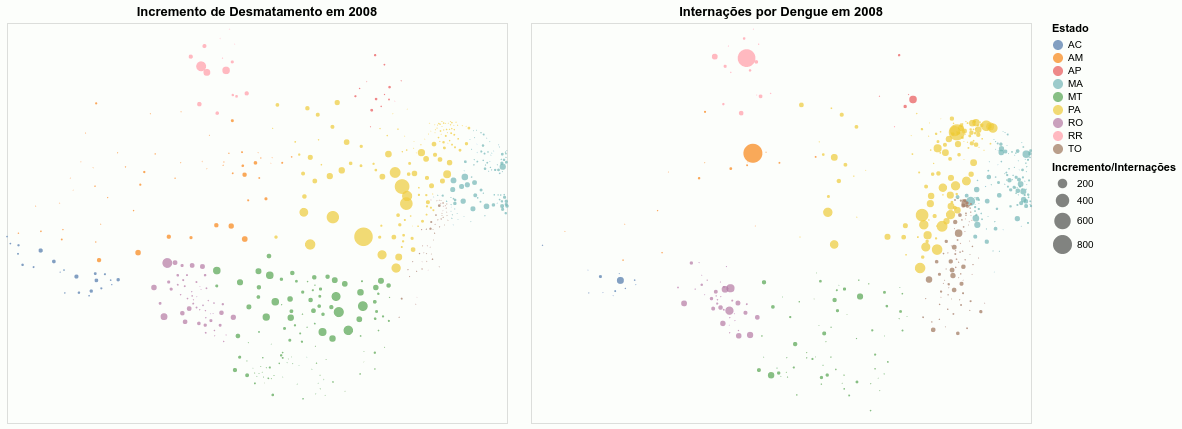

In [ ]:
def geoplot(Ano: int):
  return alt.Chart(df).mark_circle().encode(
    longitude='Long:Q',
    latitude='Lat:Q',
    color='Estado:N',
    size=f'Incremento{Ano-1}{Ano}',
    tooltip='Municipio'
  ).project(
      "mercator"
  ).properties(
      width=500,
      height=400,
      title=f'Incremento de Desmatamento em {Ano}'
  ) | alt.Chart(df).mark_circle().encode(
    longitude='Long:Q',
    latitude='Lat:Q',
    color='Estado:N',
    # size=f'Internacoes{Ano}',
    size=alt.Size(f'Internacoes{Ano}', legend=alt.Legend(title='Incremento/Internações')),
    tooltip='Municipio'
  ).project(
      "mercator"
  ).properties(
      width=500,
      height=400,
      title=f'Internações por Dengue em {Ano}'
  )

alt.Color('species', legend=alt.Legend(title="Species by color"))

interact(geoplot, Ano=(2008,2019), continuous_update=False)

interactive(children=(IntSlider(value=2013, description='Ano', max=2019, min=2008), Output()), _dom_classes=('…

<function __main__.geoplot>